# Loan Default Prediction

In [1]:
# Imorts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

# Get rid of scientific notation (e) while displaying numbers in a data frame
pd.options.display.float_format = '{:.8f}'.format

## Reading data

In [2]:
# Use pandas to read loan_data.csv as a dataframe called loans
loans = pd.read_csv('loan_data.csv')

# Check the head of loans
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.11890000,829.10000000,11.35040654,19.48000000,737,5639.95833300,28854,52.10000000,0,0,0,0
1,1,credit_card,0.10710000,228.22000000,11.08214255,14.29000000,707,2760.00000000,33623,76.70000000,0,0,0,0
2,1,debt_consolidation,0.13570000,366.86000000,10.37349118,11.63000000,682,4710.00000000,3511,25.60000000,1,0,0,0
3,1,debt_consolidation,0.10080000,162.34000000,11.35040654,8.10000000,712,2699.95833300,33667,73.20000000,1,0,0,0
4,1,credit_card,0.14260000,102.92000000,11.29973224,14.97000000,667,4066.00000000,4740,39.50000000,0,1,0,0


## Understanding data

In [3]:
# Use info on loans
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# Use describe on loans 
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.00000000,9578.00000000,9578.00000000,9578.00000000,9578.00000000,9578.00000000,9578.00000000,9578.00000000,9578.00000000,9578.00000000,9578.00000000,9578.00000000,9578.00000000
mean,0.80496972,0.12264006,319.08941324,10.93211714,12.60667885,710.84631447,4560.76719653,16913.96387555,46.79923575,1.57746920,0.16370850,0.06212153,0.16005429
std,0.39624470,0.02684699,207.07130150,0.61481275,6.88396954,37.97053723,2496.93037681,33756.18955725,29.01441697,2.20024531,0.54621492,0.26212633,0.36667554
min,0.00000000,0.06000000,15.67000000,7.54750168,0.00000000,612.00000000,178.95833330,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
25%,1.00000000,0.10390000,163.77000000,10.55841352,7.21250000,682.00000000,2820.00000000,3187.00000000,22.60000000,0.00000000,0.00000000,0.00000000,0.00000000
50%,1.00000000,0.12210000,268.95000000,10.92888357,12.66500000,707.00000000,4139.95833300,8596.00000000,46.30000000,1.00000000,0.00000000,0.00000000,0.00000000
75%,1.00000000,0.14070000,432.76250000,11.29129292,17.95000000,737.00000000,5730.00000000,18249.50000000,70.90000000,2.00000000,0.00000000,0.00000000,0.00000000
max,1.00000000,0.21640000,940.14000000,14.52835448,29.96000000,827.00000000,17639.95833000,1207359.00000000,119.00000000,33.00000000,13.00000000,5.00000000,1.00000000


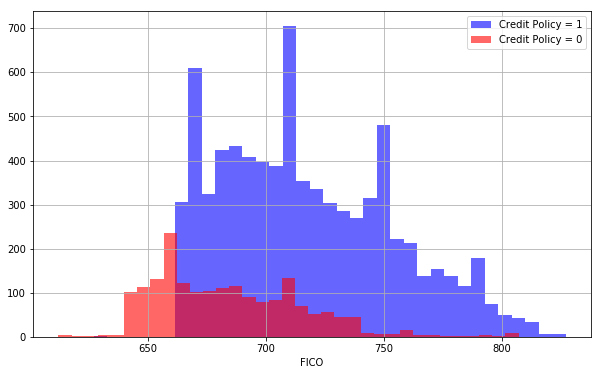

In [5]:
# Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35, color='blue', 
                                              label='Credit Policy = 1', alpha = 0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35, color='red', 
                                              label='Credit Policy = 0', alpha = 0.6)
plt.legend()
plt.xlabel('FICO')
plt.show()

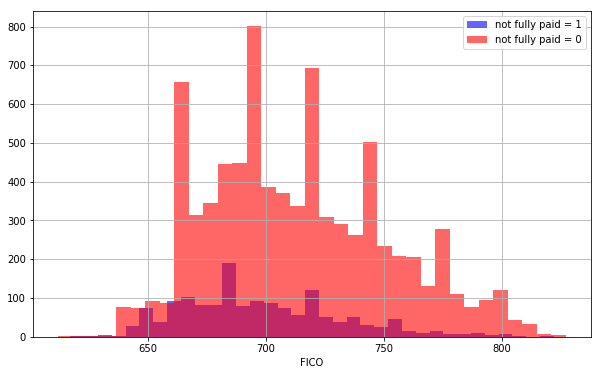

In [6]:
# Create a histogram of two FICO distributions on top of each other, one for each not.full.paid outcome.
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35, color='blue', 
                                              label='not fully paid = 1', alpha = 0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35, color='red', 
                                              label='not fully paid = 0', alpha = 0.6)
plt.legend()
plt.xlabel('FICO')
plt.show()

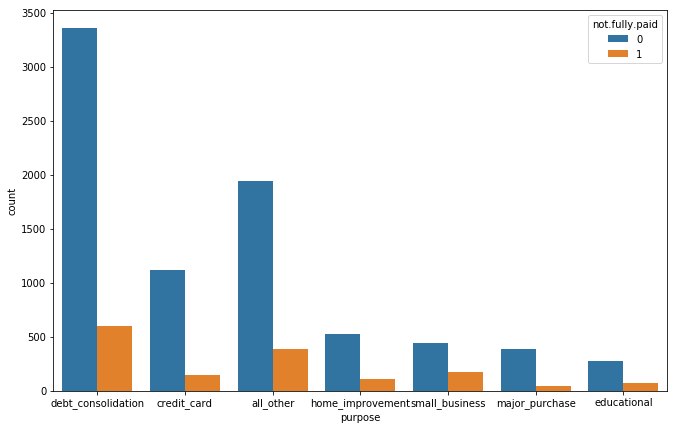

In [7]:
# Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue = 'not.fully.paid', data = loans)
plt.show()

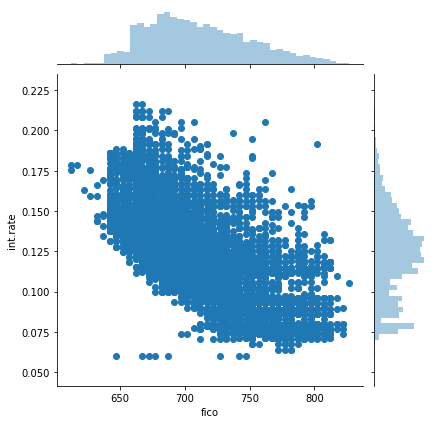

In [8]:
# Let's see the trend between FICO score and interest rate. Recreate the following jointplot.
sns.jointplot("fico", "int.rate", data=loans )
plt.show()

<Figure size 792x504 with 0 Axes>

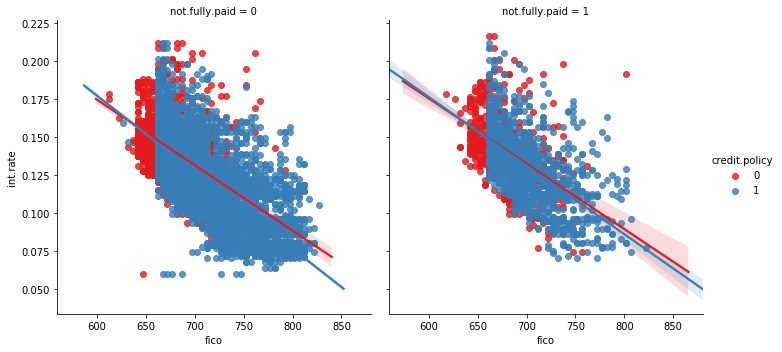

In [9]:
# Create the lmplots to see if the trend differed between not.fully.paid and credit.policy. 
plt.figure(figsize=(11, 7))
sns.lmplot('fico', 'int.rate', data = loans, hue='credit.policy', 
           col='not.fully.paid', palette = 'Set1')
plt.show()

## Data Preprocessing

In [10]:
# Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.
cat_feats = ['purpose']

# Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create 
# a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

# Show the head of final_data
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.11890000,829.10000000,11.35040654,19.48000000,737,5639.95833300,28854,52.10000000,0,0,0,0,0,1,0,0,0,0
1,1,0.10710000,228.22000000,11.08214255,14.29000000,707,2760.00000000,33623,76.70000000,0,0,0,0,1,0,0,0,0,0
2,1,0.13570000,366.86000000,10.37349118,11.63000000,682,4710.00000000,3511,25.60000000,1,0,0,0,0,1,0,0,0,0
3,1,0.10080000,162.34000000,11.35040654,8.10000000,712,2699.95833300,33667,73.20000000,1,0,0,0,0,1,0,0,0,0
4,1,0.14260000,102.92000000,11.29973224,14.97000000,667,4066.00000000,4740,39.50000000,0,1,0,0,1,0,0,0,0,0


## Preparing our data for the models and splitting data into train and cv(or test)

In [11]:
#Splitting Data into train and Test sklearn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train_main, X_test, y_train_main, y_test = train_test_split(final_data.drop('not.fully.paid', axis=1),
                                                    final_data['not.fully.paid'],
                                                    stratify= final_data['not.fully.paid'],
                                                    test_size = 0.20)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_main = sc.fit_transform(X_train_main)
X_test = sc.transform(X_test)

## Feature Scaling

In [13]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
X_train_main = r_scaler.fit_transform(X_train_main)
X_test = r_scaler.transform(X_test)

# 1. K-NN

##### Model Tuning

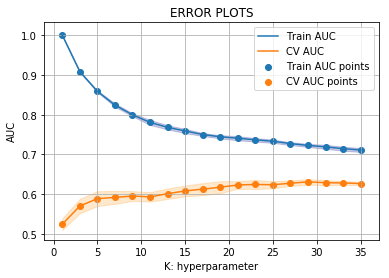

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV
neigh = KNeighborsClassifier()
parameters ={'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]}
model1=GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model1.fit(X_train_main, y_train_main);

train_auc= model1.cv_results_['mean_train_score']
train_auc_std= model1.cv_results_['std_train_score']
cv_auc = model1.cv_results_['mean_test_score'] 
cv_auc_std= model1.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [15]:
K = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
scor = [x for x in cv_auc]
best_K = K[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding k value of cv is:",best_K, '\n')

print("Best k for the model is: ", best_K)

Maximum AUC score of cv is: 0.6311383430573781
Corresponding k value of cv is: 29 

Best k for the model is:  29


##### Measuring AUC Score for Test Data

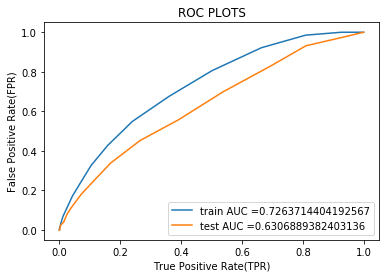

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model1 = KNeighborsClassifier(n_neighbors=best_K,algorithm='brute')
model1.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model1.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

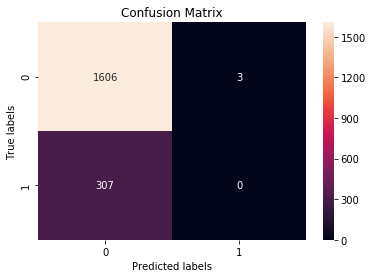

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()

def predict(proba,threshold,fpr,tpr):
    t=threshold[np.argmax(fpr*(1-tpr))]
    print("the maximun value of tpr*(1-fpr)",np.round(max(tpr*(1-fpr)),2) ,"for threshold",np.round(t,2))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


sns.heatmap(confusion_matrix(y_test, model1.predict(X_test)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model1.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      1609
          1       0.00      0.00      0.00       307

avg / total       0.71      0.84      0.77      1916



# 2. Logistic Regression

##### Model Tuning

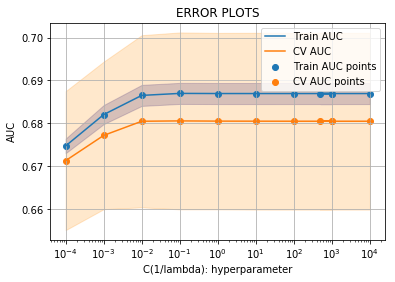

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced');
parameters ={'C':[10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]}
model2=GridSearchCV(lr, parameters, cv=10, scoring='roc_auc',return_train_score=True)
model2.fit(X_train_main, y_train_main)

train_auc= model2.cv_results_['mean_train_score']
train_auc_std= model2.cv_results_['std_train_score']
cv_auc = model2.cv_results_['mean_test_score'] 
cv_auc_std= model2.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [20]:
C = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_C = C[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding C value of cv is:",best_C, '\n')

print("Best C for the Model is: ", best_C)

Maximum AUC score of cv is: 0.6805905579133292
Corresponding C value of cv is: 0.1 

Best C for the Model is:  0.1


##### Measuring the AUC score for Test Data

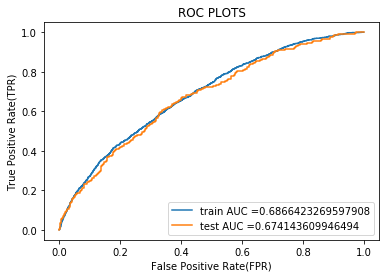

In [21]:
from sklearn.metrics import roc_curve, auc

model2 = LogisticRegression(C=best_C,class_weight='balanced');
model2.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model2.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

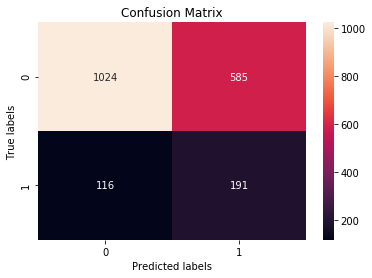

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model2.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.90      0.64      0.74      1609
          1       0.25      0.62      0.35       307

avg / total       0.79      0.63      0.68      1916



# 3. Decision Tree

##### Model Tuning

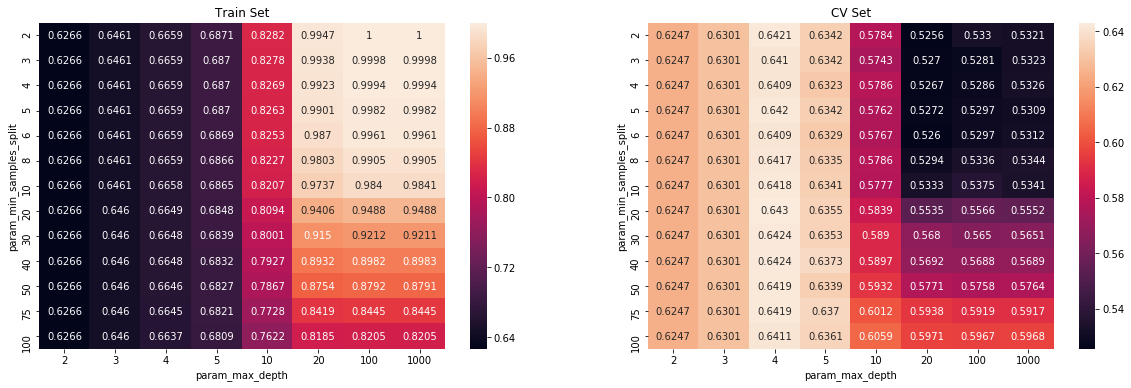

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [2,3,4,5,10,20,100, 1000], 'min_samples_split': [2,3,4,5,6,8, 10,20,30,40,50,75, 100]}
model3 = GridSearchCV(dt, parameters, cv=10, scoring='roc_auc',return_train_score=True)
model3.fit(X_train_main, y_train_main)

max_scores1 = pd.DataFrame(model3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [25]:
print(model3.best_params_)

{'max_depth': 4, 'min_samples_split': 20}


##### Measuring AUC Score for Test Data

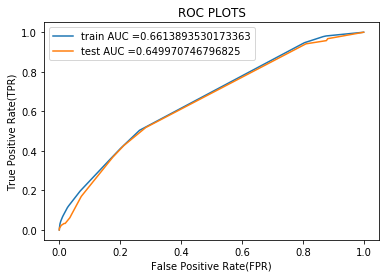

In [26]:
model3 = DecisionTreeClassifier(**model3.best_params_)
model3.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model3.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model3.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

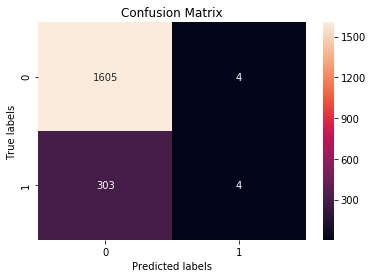

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model3.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model3.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      1609
          1       0.50      0.01      0.03       307

avg / total       0.79      0.84      0.77      1916



# 4. SVM

### L2 Regularization

##### Model Tuning

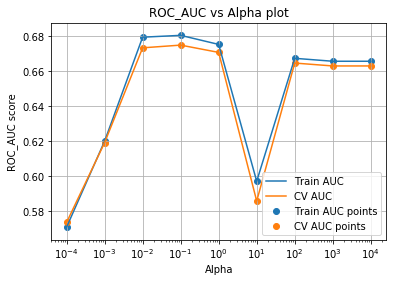

In [29]:
from sklearn.linear_model import SGDClassifier

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sgdc = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
model4 = GridSearchCV(sgdc, parameters, cv= 10, scoring='roc_auc',return_train_score=True)
model4.fit(X_train_main, y_train_main)

train_auc = model4.cv_results_['mean_train_score']
cv_auc= model4.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

In [30]:
alpha = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_alpha = alpha[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding alpha value of cv is:",best_alpha, '\n')

print("Best alpha for the model is: ", best_alpha)

Maximum AUC score of cv is: 0.6748825795006279
Corresponding alpha value of cv is: 0.1 

Best alpha for the model is:  0.1


##### Measuring the AUC Score for Test Data

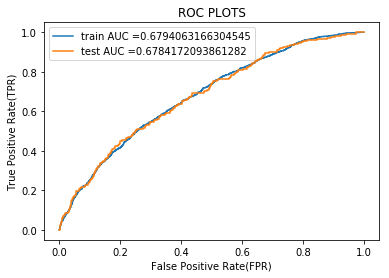

In [31]:
model4 = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced', alpha = best_alpha)
model4.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model4.decision_function(X_train_main)
y_test_pred = model4.decision_function(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_main, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

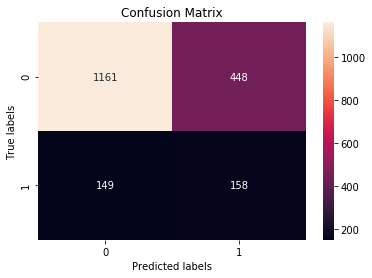

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model4.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model4.predict(X_test)))

             precision    recall  f1-score   support

          0       0.89      0.72      0.80      1609
          1       0.26      0.51      0.35       307

avg / total       0.79      0.69      0.72      1916



### L1 Regularization

##### Model Tuning

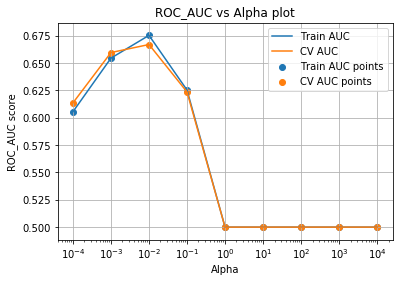

In [34]:
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sgdc = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
model5 = GridSearchCV(sgdc, parameters, cv= 10, scoring='roc_auc',return_train_score=True)
model5.fit(X_train_main, y_train_main)
train_auc = model5.cv_results_['mean_train_score']
cv_auc= model5.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

In [35]:
alpha = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_alpha = alpha[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding alpha value of cv is:",best_alpha, '\n')

print("Best alpha for the model is: ", best_alpha)

Maximum AUC score of cv is: 0.6670254826599681
Corresponding alpha value of cv is: 0.01 

Best alpha for the model is:  0.01


##### Measuring the AUC Score for Test Data

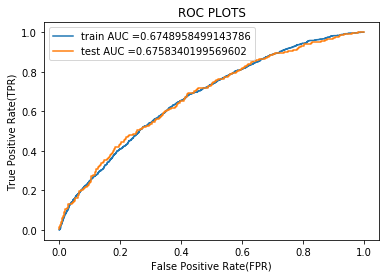

In [36]:
model5 = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced', alpha = best_alpha)
model5.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model5.decision_function(X_train_main)
y_test_pred = model5.decision_function(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_main, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

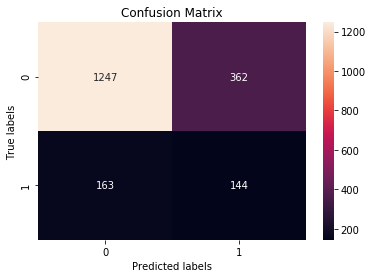

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model5.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model5.predict(X_test)))

             precision    recall  f1-score   support

          0       0.88      0.78      0.83      1609
          1       0.28      0.47      0.35       307

avg / total       0.79      0.73      0.75      1916



# 5. Random Forest

##### Model Tuning 

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
parameters = {'n_estimators': [300], 'max_depth': [2, 5, 10, 20, None], "max_features": [2,5,10],
              'min_samples_split': [2, 5, 10]}
model6 = GridSearchCV(rf, parameters, cv=4, scoring='roc_auc',return_train_score=True)
model6.fit(X_train_main, y_train_main)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [300], 'max_depth': [2, 5, 10, 20, None], 'max_features': [2, 5, 10], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [40]:
print(model6.best_params_)

{'max_depth': 5, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 300}


##### Measuring the AUC Score for Test Data

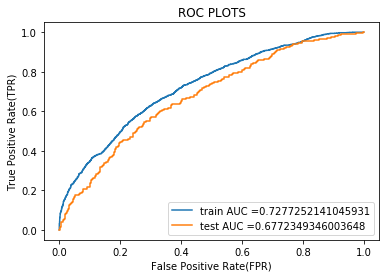

In [41]:
model6 = RandomForestClassifier(**model6.best_params_)
model6.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model6.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model6.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

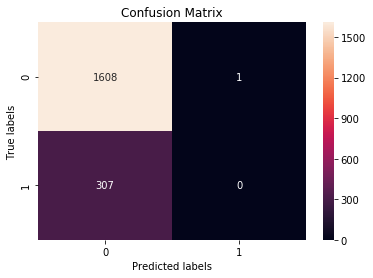

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model6.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model6.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      1609
          1       0.00      0.00      0.00       307

avg / total       0.71      0.84      0.77      1916



# 6. Gradient Boosting

##### Model Tuning 

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
parameters = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [2,5,10],
             "n_estimators": [500],
             "subsample": [1,0.5,0.8]}

model7 = GridSearchCV(gb_model, parameters, cv=4, scoring='roc_auc',return_train_score=True)
model7.fit(X_train_main, y_train_main)

GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.001, 0.1, 0.01], 'max_depth': [2, 5, 10], 'n_estimators': [500], 'subsample': [1, 0.5, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [45]:
print(model7.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}


##### Measuring the AUC Score for Test Data 

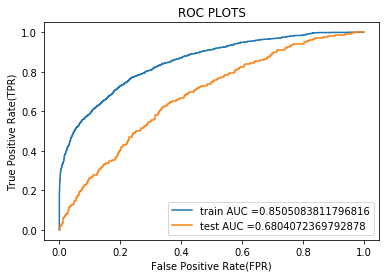

In [46]:
model7 = GradientBoostingClassifier(**model7.best_params_)
model7.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model7.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model7.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

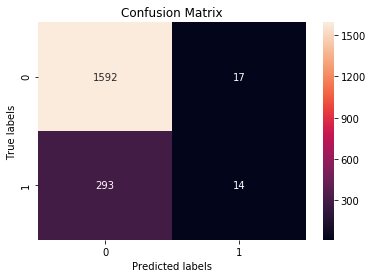

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model7.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model7.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91      1609
          1       0.45      0.05      0.08       307

avg / total       0.78      0.84      0.78      1916



# 7. Light GBM

##### Model Tuning

In [49]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()
parameters = {"learning_rate": [0.01, 0.05, 0.1],
              "n_estimators": [800],
              "max_depth":[5,8,10],
              "colsample_bytree": [1,0.5,0.3]}

model8 = GridSearchCV(lgbm_model, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model8.fit(X_train_main, y_train_main)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [800], 'max_depth': [5, 8, 10], 'colsample_bytree': [1, 0.5, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [50]:
print(model8.best_params_)

{'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 800}


##### Measuring the AUC Score for Test Data

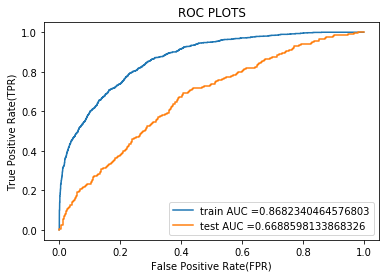

In [51]:
model8 = LGBMClassifier(**model8.best_params_)
model8.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model8.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model8.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


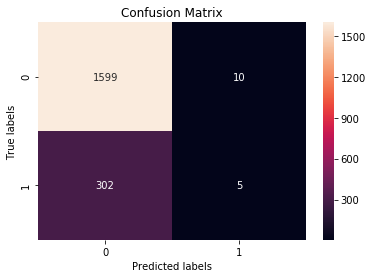

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model8.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model8.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91      1609
          1       0.33      0.02      0.03       307

avg / total       0.76      0.84      0.77      1916



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# 8.XGBoost

##### Model Tuning

In [54]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
parameters = {"learning_rate": [0.1,0.01,1],
             "max_depth": [2,5,8],
             "n_estimators": [800],
             "colsample_bytree": [0.3,0.6,1]}

model9 = GridSearchCV(xgb_model, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model9.fit(X_train_main, y_train_main)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.01, 1], 'max_depth': [2, 5, 8], 'n_estimators': [800], 'colsample_bytree': [0.3, 0.6, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [55]:
print(model9.best_params_)

{'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 800}


##### Measuring the AUC Score for Test Data

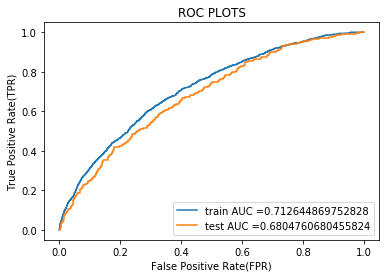

In [56]:
model9 = XGBClassifier(**model9.best_params_)
model9.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model9.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model9.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


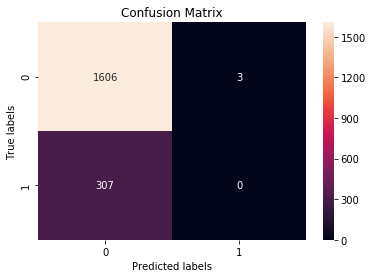

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model9.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');  

##### Classification Report

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model9.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      1609
          1       0.00      0.00      0.00       307

avg / total       0.71      0.84      0.77      1916



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Conclusion

In [59]:
# Compare all models using Prettytable library
# how to use pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("Model", "AUC Score", "Recall Score", "F1 Score")
tb.add_row(["KNN", "0.630", "0.00", "0.00"])
tb.add_row(["Logistic Regression", "0.674", "0.62", "0.35"])
tb.add_row(["Decision Tree", "0.649", "0.01", "0.03"])
tb.add_row(["SVM - L2 Regularization", "0.678", "0.51", "0.35"])
tb.add_row(["SVM - L1 Regularization", "0.675", "0.47", "0.35"])
tb.add_row(["Random Forest", "0.677", "0.00", "0.00"])
tb.add_row(["Gradient Boosting", "0.680", "0.05", "0.08"])
tb.add_row(["Light GBM", "0.668", "0.02", "0.03"])
tb.add_row(["XGBoost", "0.680", "0.00", "0.00"])

print(tb)

+-------------------------+-----------+--------------+----------+
|          Model          | AUC Score | Recall Score | F1 Score |
+-------------------------+-----------+--------------+----------+
|           KNN           |   0.630   |     0.00     |   0.00   |
|   Logistic Regression   |   0.674   |     0.62     |   0.35   |
|      Decision Tree      |   0.649   |     0.01     |   0.03   |
| SVM - L2 Regularization |   0.678   |     0.51     |   0.35   |
| SVM - L1 Regularization |   0.675   |     0.47     |   0.35   |
|      Random Forest      |   0.677   |     0.00     |   0.00   |
|    Gradient Boosting    |   0.680   |     0.05     |   0.08   |
|        Light GBM        |   0.668   |     0.02     |   0.03   |
|         XGBoost         |   0.680   |     0.00     |   0.00   |
+-------------------------+-----------+--------------+----------+
